In [65]:
from netCDF4 import Dataset
import numpy as np
import datetime as dt
import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.ndimage as ndimage


from netCDFfunc.utility import create_new_variable, get_stat, get_data_by_date, get_data_A, save_img, test_data_write, show_img

In [88]:
base_dir = '/Volumes/T7/AVHRR_OI_SST/v2.1'

In [89]:
value = get_data_by_date(base_dir = base_dir,
                           get_data_func = get_data_A,
                           var_name = 'sst',
                           start_date = (1981, 9, 1),
                           end_date = (2011,8,31),
                           specific_date = (1,1))

  0%|          | 0/31 [00:00<?, ?it/s]

In [102]:
value_2020 = get_data_by_date(base_dir = base_dir,
                           get_data_func = get_data_A,
                           var_name = 'sst',
                           start_date = (1981, 9, 1),
                           end_date = (2021,8,31),
                            specific_year=2020,
                           specific_date = (1,1))

  0%|          | 0/41 [00:00<?, ?it/s]

In [93]:
std = np.std(value[(1,1)], axis=0)

In [76]:
dspc = Dataset('/Volumes/T7/new_data/processed_data_example/nc/7_30_years_dataset_1_90_percentile.nc', 'r', format="NETCDF4")

In [77]:
dsavg = Dataset('/Volumes/T7/new_data/processed_data_example/nc/1_30_years_dataset_1_global.nc', 'r', format="NETCDF4")

In [78]:
average = dsavg.variables['avgsst'][:].data[0]

In [81]:
average

array([[-999.       , -999.       , -999.       , ..., -999.       ,
        -999.       , -999.       ],
       [-999.       , -999.       , -999.       , ..., -999.       ,
        -999.       , -999.       ],
       [-999.       , -999.       , -999.       , ..., -999.       ,
        -999.       , -999.       ],
       ...,
       [  -1.7276666,   -1.7276666,   -1.7276666, ...,   -1.7283334,
          -1.728    ,   -1.7276666],
       [  -1.7299998,   -1.7299998,   -1.7299998, ...,   -1.7299998,
          -1.7299998,   -1.7299998],
       [  -1.7303332,   -1.7303332,   -1.7303332, ...,   -1.7303332,
          -1.7303332,   -1.7303332]], dtype=float32)

In [106]:
anormally = dspc.variables['90pctlSST'][:].data - value_2020[(1,1)]
anormally = anormally[0]

In [107]:
std

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.05469207, 0.05469207, 0.05469207, ..., 0.05391867, 0.05491812,
        0.05469207],
       [0.0527889 , 0.0527889 , 0.0527889 , ..., 0.0527889 , 0.0527889 ,
        0.0527889 ],
       [0.0507598 , 0.0507598 , 0.0507598 , ..., 0.0507598 , 0.0507598 ,
        0.0507598 ]], dtype=float32)

In [118]:
grade = np.abs(anormally // std)

/var/folders/3k/05vd5sp53wbgspztyxv0ksfm0000gn/T/ipykernel_33919/849850772.py:1: RuntimeWarning: divide by zero encountered in floor_divide
  grade = np.abs(anormally // std)
/var/folders/3k/05vd5sp53wbgspztyxv0ksfm0000gn/T/ipykernel_33919/849850772.py:1: RuntimeWarning: invalid value encountered in floor_divide
  grade = np.abs(anormally // std)


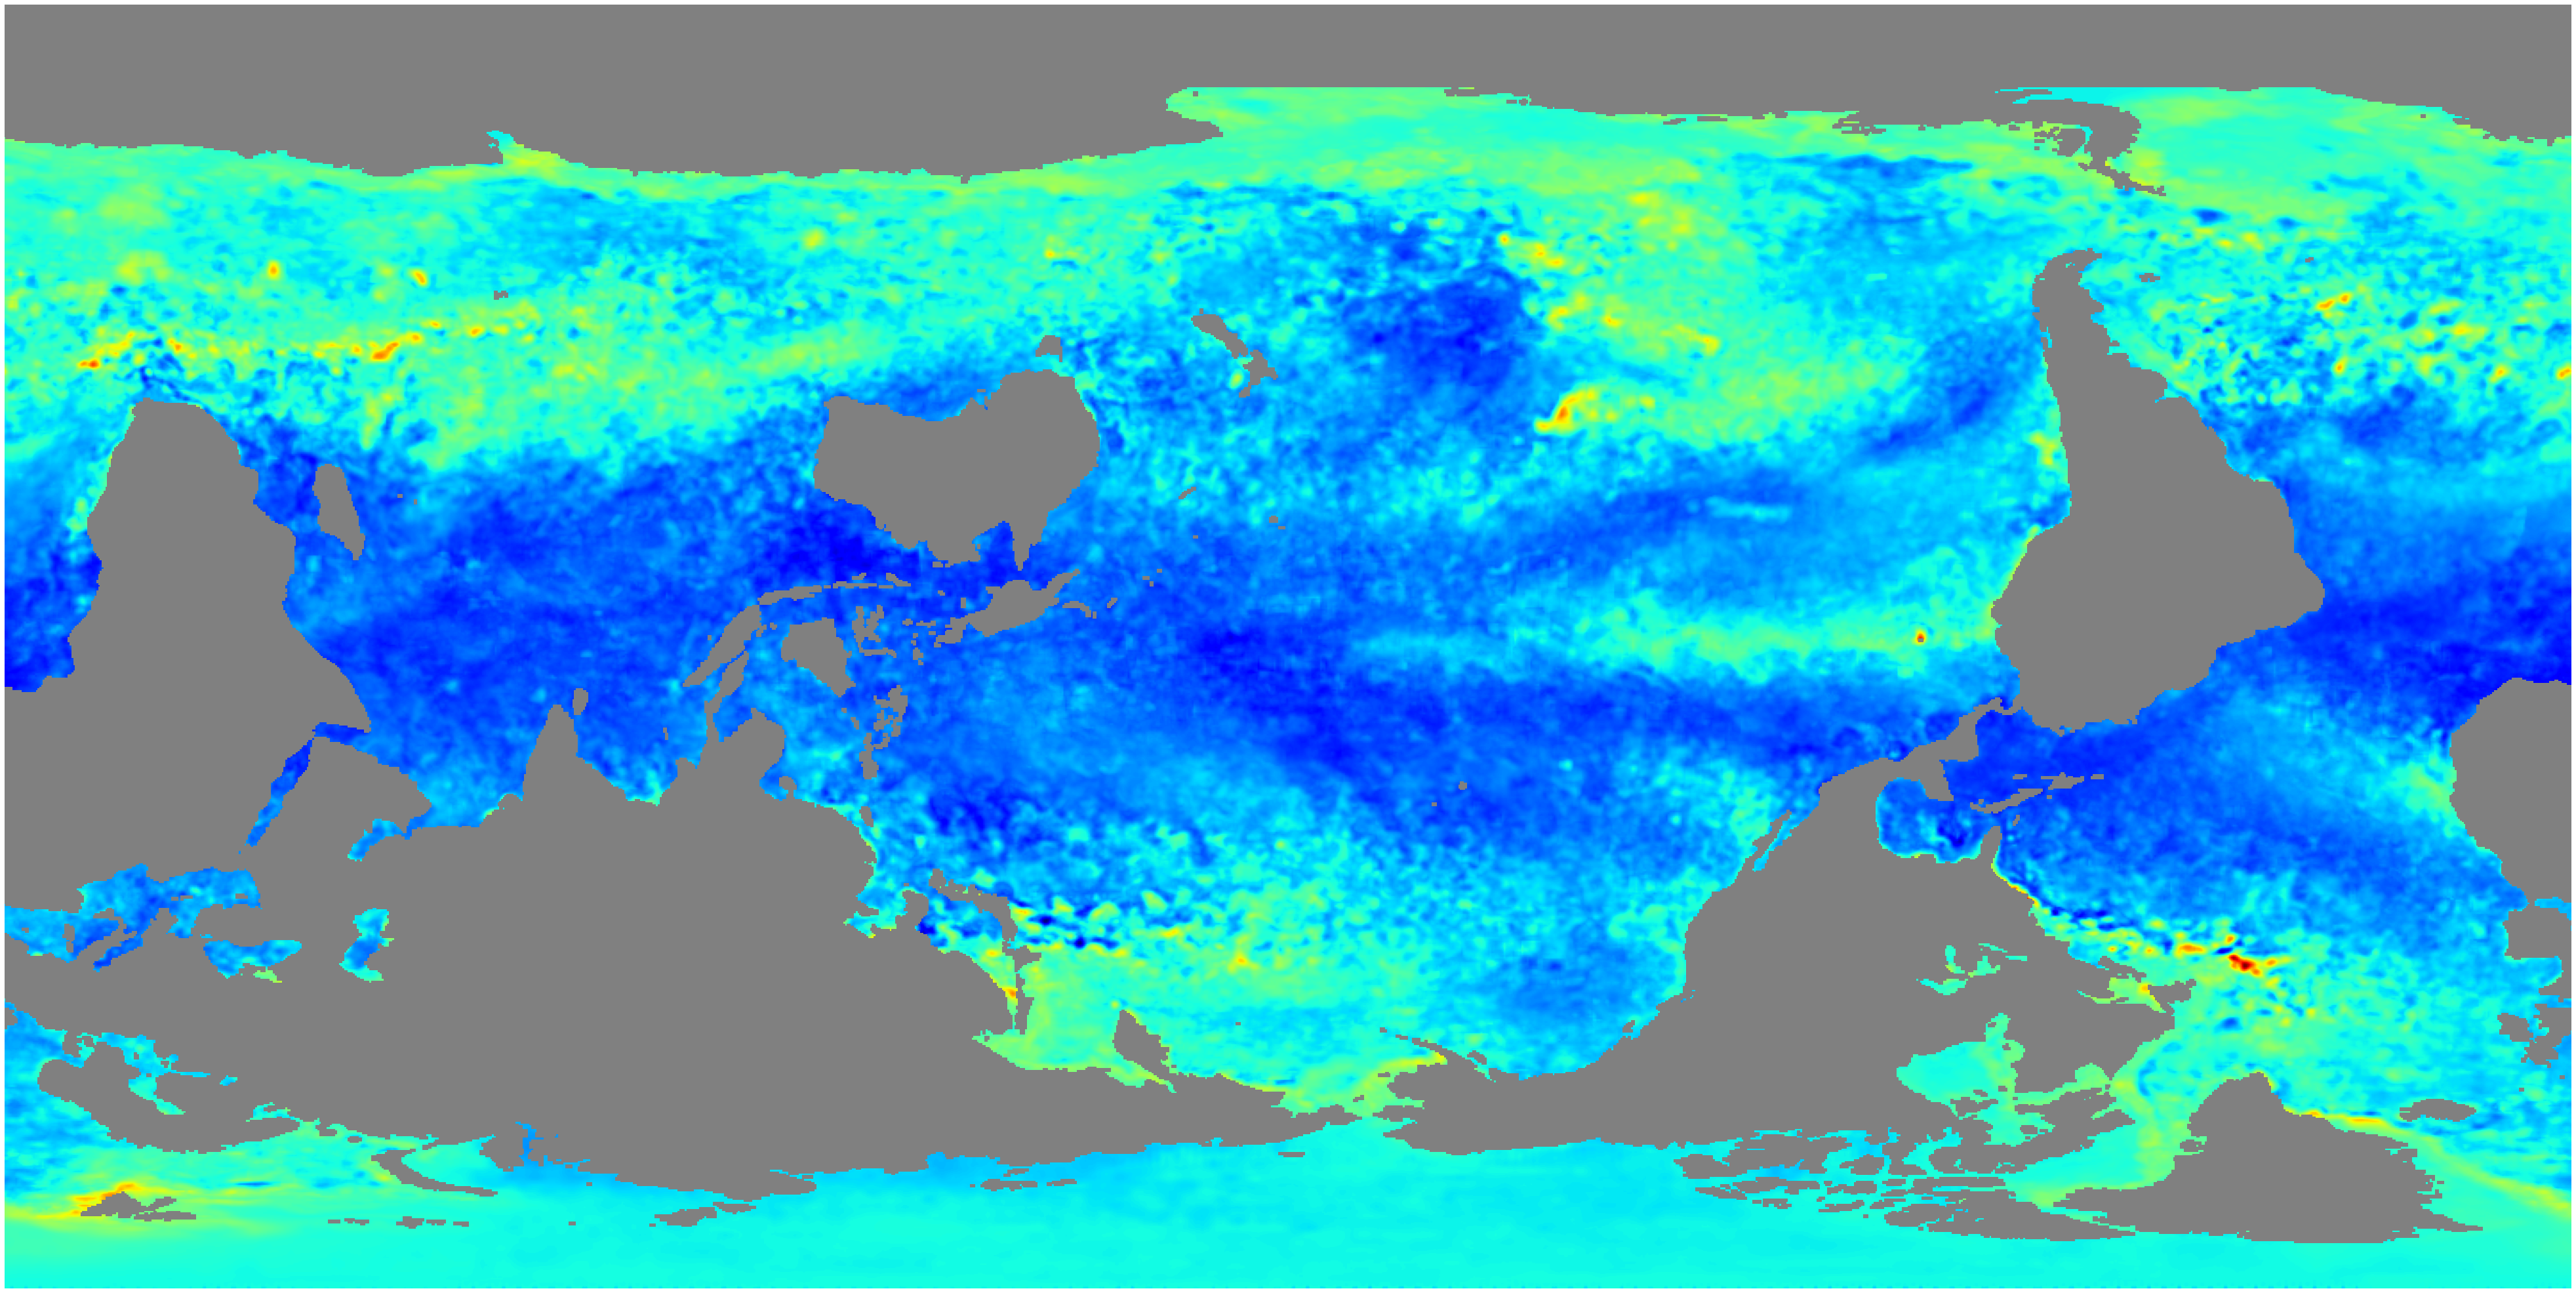

In [82]:
base_dir = '/Volumes/T7/new_data/processed_data_example'
file_name = '0_anormally_sample'

nc_path = os.path.join(base_dir, 'nc' ,file_name+'.nc')
img_path = os.path.join(base_dir, 'img' ,file_name+'.jpg')

ds_new = Dataset(nc_path, 'w', format='NETCDF4')
title = '2020/1/1 anormal sst'
comment = 'anormal stt for 1980-2011'
grid_size = 0.25

data = anormally

variable_name = 'avgsst'
variable_standard_name = 'averageSST'
variable_unit = 'degree C'
variable_dtype = np.float32
variable_values = data

ds_new = test_data_write(ds_new, title, comment, grid_size,
                                 variable_name, 
                                 variable_standard_name, 
                                 variable_unit, 
                                 variable_dtype, 
                                 variable_values)

save_img(data, img_path)

ds_new.close()

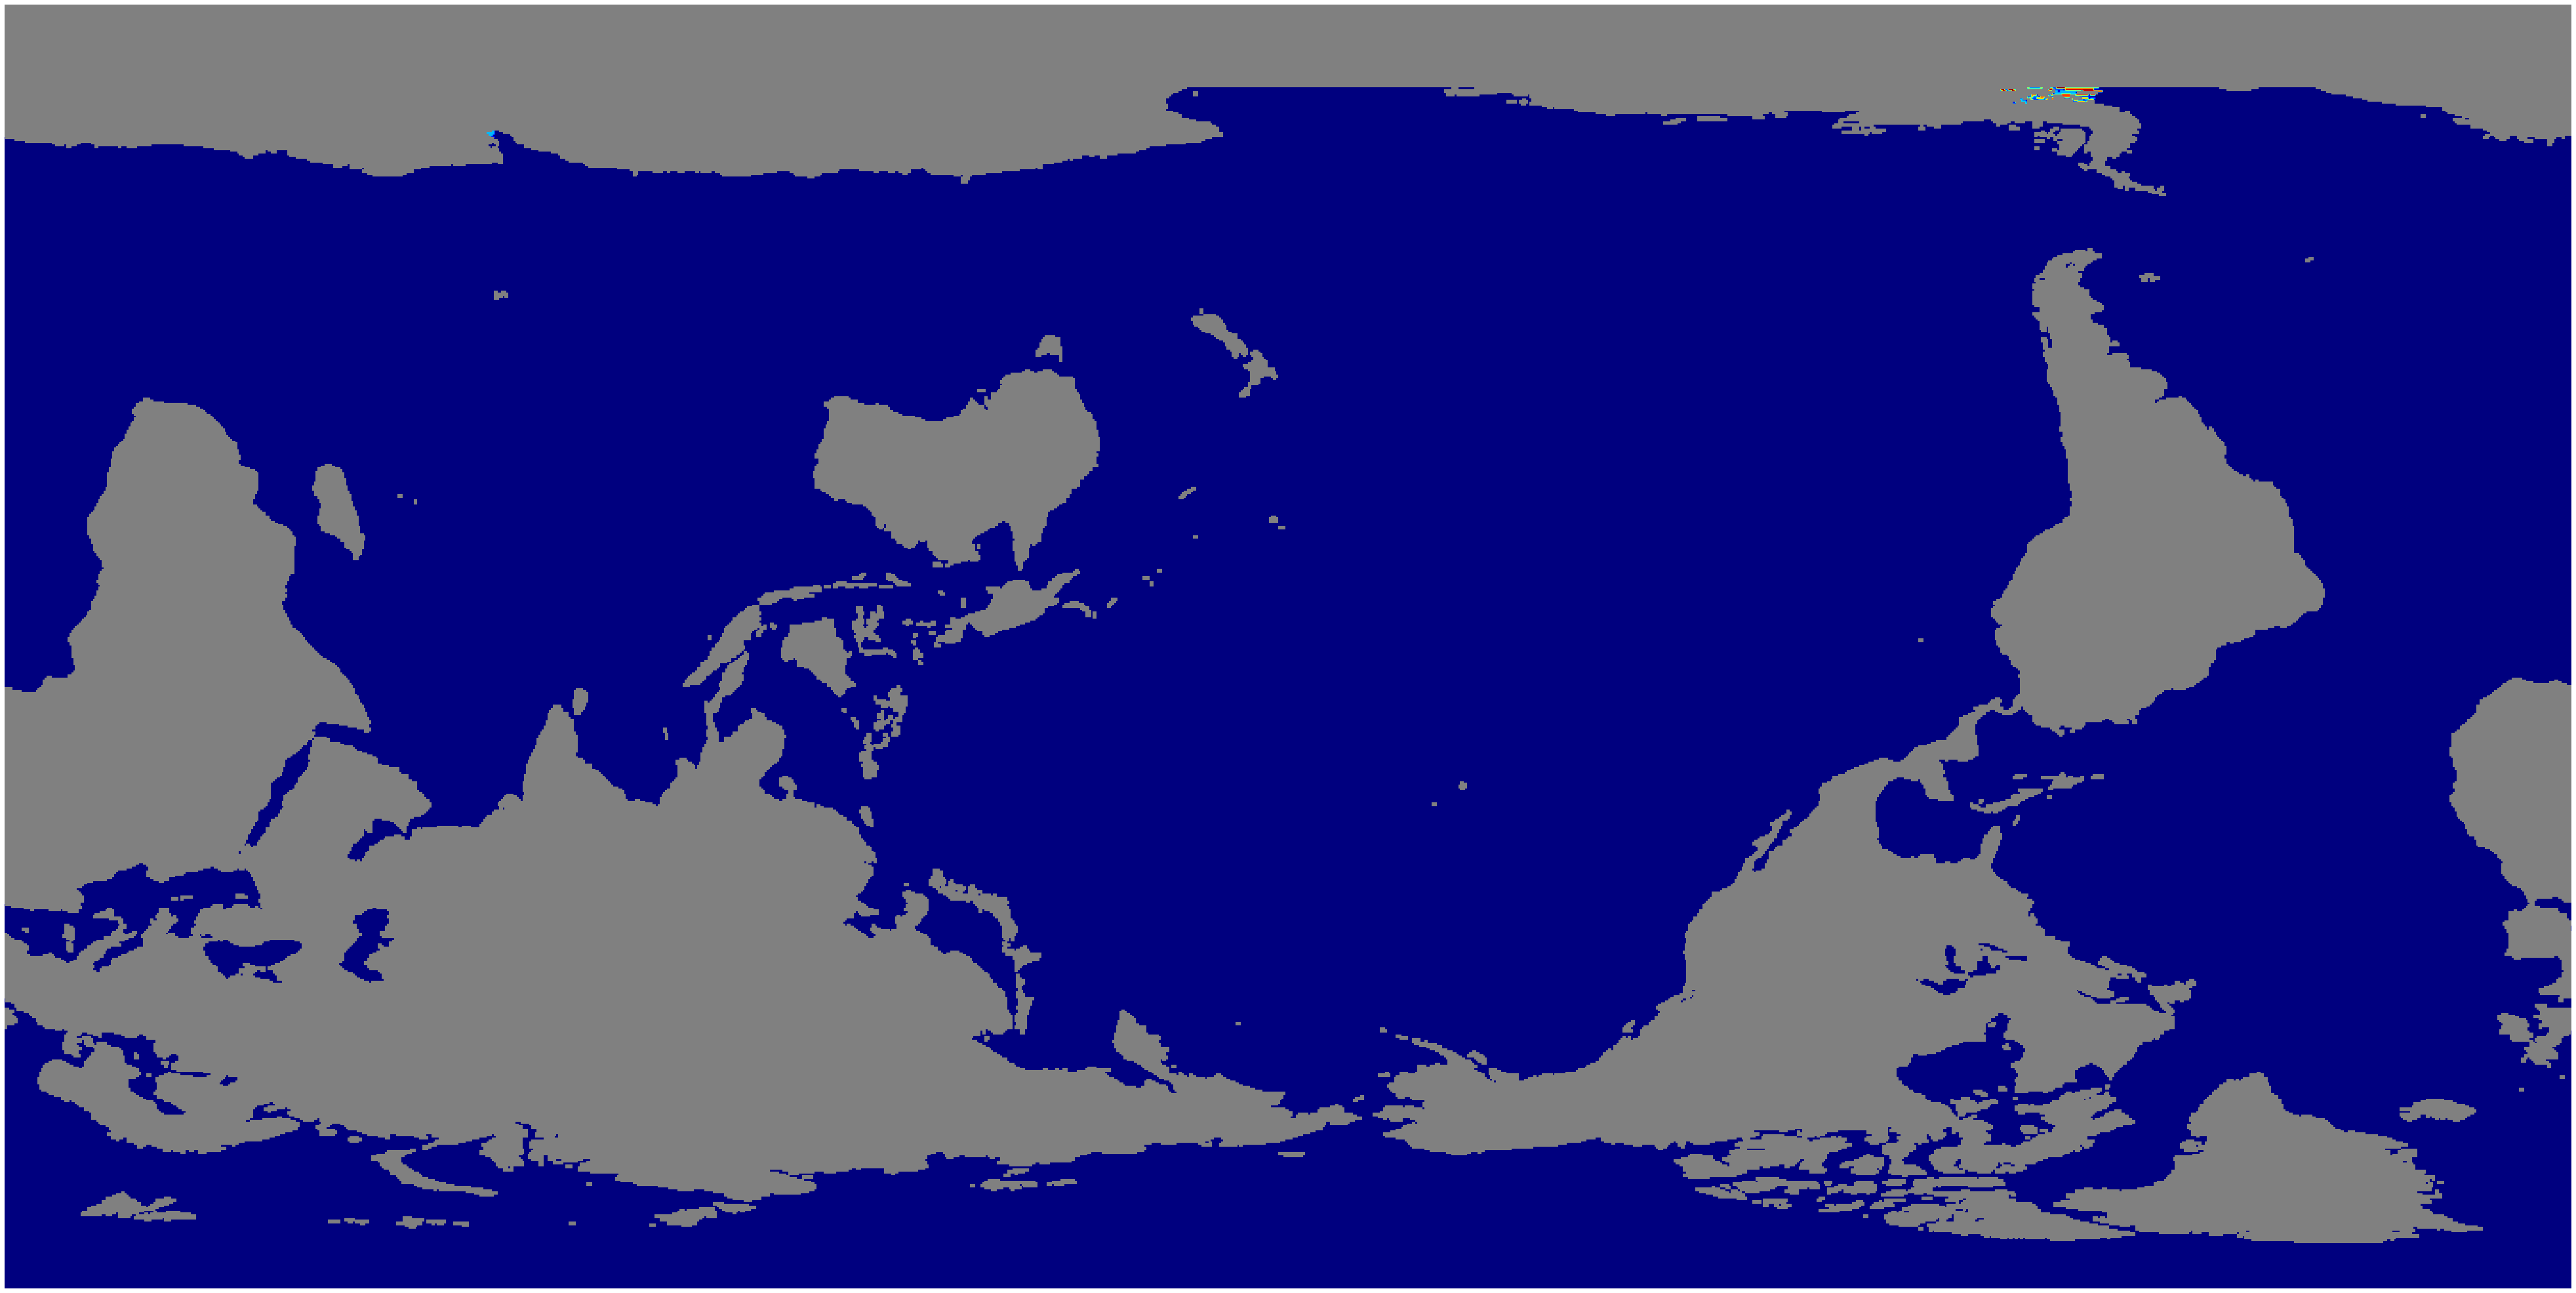

In [120]:
base_dir = '/Volumes/T7/new_data/processed_data_example'
file_name = '0_grade_sample'

nc_path = os.path.join(base_dir, 'nc' ,file_name+'.nc')
img_path = os.path.join(base_dir, 'img' ,file_name+'.jpg')

ds_new = Dataset(nc_path, 'w', format='NETCDF4')
title = '2020/1/1 anormally grade'
comment = 'anormally grade for 1980-2011'
grid_size = 0.25

data = grade

variable_name = 'avgsst'
variable_standard_name = 'averageSST'
variable_unit = 'degree C'
variable_dtype = np.int8
variable_values = data

ds_new = test_data_write(ds_new, title, comment, grid_size,
                                 variable_name, 
                                 variable_standard_name, 
                                 variable_unit, 
                                 variable_dtype, 
                                 variable_values)

save_img(data, img_path)

ds_new.close()

In [114]:
ds_new.close()

In [117]:
for r in grade:
    print(r)

[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan nan ... nan nan nan]
[nan nan n